## 05 Model Evaluation

#### Import relevant libraries

In [1]:
import os
from joblib import dump, load
import numpy as np
import pandas as pd

#### Load model_fit file

In [15]:
input_dir = os.path.join('..', 'data', 'processed')
lin_model = load(os.path.join(input_dir, 'lin_model_2.joblib'))
lin_model

LinearRegression()

#### Load in test and train data from step 4 file (model training step)

In [16]:
X_train = np.load(os.path.join(input_dir, 'X_train.npy'))
X_test = np.load(os.path.join(input_dir, 'X_test.npy'))
y_train = np.load(os.path.join(input_dir, 'Y_train.npy'))
y_test = np.load(os.path.join(input_dir, 'y_test.npy'))

In [17]:
# Predict on the test data 
y_pred_lin = lin_model.predict(X_test)

In [18]:
lin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})
lin_df

,Actual,Predicted
0,-0.011143,0.013708
1,0.035763,-0.002108
2,0.005074,0.001034
3,0.013494,0.008098
4,0.006932,0.000081
5,0.023854,0.015347
6,0.023928,0.013203
7,0.021072,0.000686
8,0.004868,0.014608
9,0.002663,0.005406


#### Compute fit statistics

(a) Bias := $\sum (\hat{y_i} - y_i) $

In [30]:
bias_lin = sum(y_pred_lin - y_test)
bias_lin

-0.12267957864676636

(b) Mean Absolute Error := $\frac{1}{n} \sum |\hat{y_i} - y_i|$

In [9]:
# Import mean_absolute_error, mean_squared_error from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# Compare MAE of the models
mae_lin = mean_absolute_error(y_test, y_pred_lin)
print("MAE of Linear Regression: {}".format(mae_lin))
# rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
# print("RMSE of Random Forest: {}".format(rmse_forest))

MAE of Linear Regression: 0.016743523368629488


(c) Mean Square Error := $\frac{1}{n} \sum (\hat{y_i} - y_i)^2$

In [20]:
# Compare RMSE of the models
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print("RMSE of Linear Regression: {}".format(rmse_lin))
# rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
# print("RMSE of Random Forest: {}".format(rmse_forest))

RMSE of Linear Regression: 0.020274930756602163


(d) R squared := $1 - \frac{RSS}{TSS}$ := $1- \frac{\sum (\hat{y_i}-y_i)^2}{\sum (y_i - \mu)^2}$

In [21]:
# Compare R^2 of the models
print("R^2 of Linear Regression: {}".format(lin_model.score(X_test, y_test)))
# print("R^2 of Random Forest: {}".format(reg_forest.score(X_test, y_test)))

R^2 of Linear Regression: -0.21507562961955906


#### Coefficient value estimates, p-values and std error for each feature variable

In [33]:
import statsmodels.api as sm

In [39]:
X2_train = sm.add_constant(X_train)
ols_result = sm.OLS(y_train, X2_train).fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     6.086
Date:                Sun, 01 May 2022   Prob (F-statistic):           9.23e-06
Time:                        23:47:20   Log-Likelihood:                 222.09
No. Observations:                  92   AIC:                            -428.2
Df Residuals:                      84   BIC:                            -408.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.002      2.620      0.010       0.001       0.011
x1            -0.0005      0.003     -0.171      0.865      -0.006       0.005
x2             0.0099      0.003      3.394      0.001       0.004       0.016
x3             0.0111      0.002      4.843      0.000       0.007       0.016
x4            -0.0044      0.003     -1.655      0.102      -0.010       0.001
x5            -0.0018      0.002     -0.787      0.433      -0.006       0.003
x6            -0.0066      0.003     -2.421      0.018      -0.012      -0.001
x7             0.0008      0.002      0.341      0.734      -0.004       0.006
==============================================================================
Omnibus:                       12.548   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.345
Skew:                          -0.599   Prob(JB):                     0.000104
Kurtosis:                       4.831   Cond. No.                         2.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Partial dependence plots

In [13]:
import matplotlib.pyplot as plt

In [59]:
X_0_test = [item[0] for item in X_test]
X_1_test = [item[1] for item in X_test]
X_2_test = [item[2] for item in X_test]
X_3_test = [item[3] for item in X_test]
X_4_test = [item[4] for item in X_test]
X_5_test = [item[5] for item in X_test]
X_6_test = [item[6] for item in X_test]

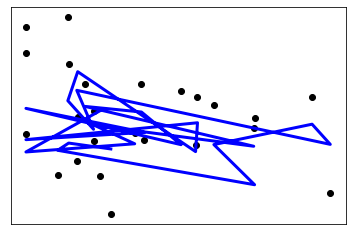

In [66]:
plt.scatter(X_0_test, y_test, color="black")
plt.plot(X_0_test, y_pred_lin, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()